###### 금융데이터 수집하기

데이터 수집 방법.(주가 등)
1. FinanceDataReader
2. pandas_datareader
3. yfinance 
4. pykrx

(참고사항)

금융관련 주요 데이터 수집처

1.  한국은행 (ECOS ) " # https://ecos.bok.or.kr/#/  : 경제 데이터

2. 한국거래소 정보데이터시스템 http://data.krx.co.kr/contents/MDC/MAIN/main/index.cmd

 한국거래소 상장공시시스템 https://kind.krx.co.kr/main.do?method=loadInitPage&scrnmode=1

3. 금융감독원 전자공시시스템 https://dart.fss.or.kr/

금융감독원 파인 https://fine.fss.or.kr/fine/main/main.do?menuNo=900000 : 금융상품 한눈에, 금융기관 건전성, 보험상품 다모아

4. 은행연합회 소비자포털 https://portal.kfb.or.kr/main/main.php
: 금융상품 금리, 대출금리 등

5. 통계청 통계포털 :  https://kosis.kr/index/index.do

# FinanceDataReader
https://financedata.github.io/posts/finance-data-reader-users-guide.html

In [1]:
# 1. FinanceDataReader ;
# 현재 시점의 증권시장별 상장종목에 대한 여러 정보를 가져올 수 있음
# 종목코드, 시장, 종목명, 섹터, 산업군, 상장일, 결산월 등 
# 상장폐지 종목도 조회 가능

## FinanceDataReader 설치하기

In [2]:
!pip install -U finance-datareader

## FinanceDataReader 불러오기

In [3]:
# 별칭 fdr 으로 불러오기

import FinanceDataReader as fdr

In [4]:
# 버젼 확인하기
fdr.__version__

'0.9.50'

## 데이터 가져오기

### 시장 전체 데이터

In [5]:
# 시장별 종목리스트를 가져오기 (최근일 기준)
# 코스피, 코스닥, 코넥스 전체 : 'KRX'

import FinanceDataReader as fdr

stocks = fdr.StockListing('KRX') 
stocks

stocks.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,68500,1,100,0.15,68100,68700,68000,8143646,557101351300,408333126420000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,585000,1,11000,1.92,574000,585000,572000,255672,148466402000,136656000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,97700,2,-200,-0.20,97400,97800,96300,2089147,202865998900,70689029641500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,792000,3,0,0.00,789000,793000,785000,33002,26063977000,56369808000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,720000,1,1000,0.14,719000,734000,716000,180724,130855265000,50897079303000,70592343,STK


In [6]:
len(stocks)

2717

### 시장별 데이터 가져오기 : 'KOSPI', 'KODAQ', 'KONEX'

In [7]:
# KOSPI 시장인 경우
stocks_kospi = fdr.StockListing('KOSPI') 

# 앞부분 5개 뒷부분 5개 보여준다.
stocks_kospi

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,68500,1,100,0.15,68100,68700,68000,8143646,557101351300,408930104675000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,585000,1,11000,1.92,574000,585000,572000,255672,148466402000,136656000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,97700,2,-200,-0.20,97400,97800,96300,2089147,202865998900,70689029641500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,792000,3,0,0.00,789000,793000,785000,33002,26063977000,56369808000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,720000,1,1000,0.14,719000,734000,716000,180724,130855265000,50897079303000,70592343,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,000545,KR7000541003,흥국화재우,KOSPI,,5540,1,10,0.18,5530,5600,5530,365,2032470,4254720000,768000,STK
944,001527,KR7001522002,동양2우B,KOSPI,,13090,1,10,0.08,13120,13120,13090,26,340490,4039168210,308569,STK
945,002787,KR7002782001,진흥기업2우B,KOSPI,,13330,3,0,0.00,13490,13490,13100,365,4808080,3903257920,294808,STK
946,001525,KR7001521004,동양우,KOSPI,,6190,1,60,0.98,6130,6190,6130,644,3974930,3823754890,617731,STK


## 데이터 탐색하기 (EDA : Exploratory Data Analysis)

In [8]:
# 탐색적 데이터 분석(EDA)이란?
# 데이터(Raw data)를 가지고 유연하게 데이터를 탐색
# 데이터의 특징과 구조로부터 얻은 정보를 바탕으로 통계모형을 만드는 분석방법
# 기술통계 활용 : 기초통계량,  시각화

### 데이터 행과 열을 확인해보기

In [9]:
# shape
stocks_kospi = fdr.StockListing('KOSPI') 
stocks_kospi.shape

(948, 17)

### 데이터 정보 확인해보기

In [10]:
# info

stocks_kospi = fdr.StockListing('KOSPI') 
stocks_kospi.info

<bound method DataFrame.info of        Code        ISU_CD      Name Market Dept   Close ChangeCode  Changes  \
0    005930  KR7005930003      삼성전자  KOSPI        68500          1      100   
1    373220  KR7373220003  LG에너지솔루션  KOSPI       585000          1    11000   
2    000660  KR7000660001    SK하이닉스  KOSPI        97700          2     -200   
3    207940  KR7207940008  삼성바이오로직스  KOSPI       792000          3        0   
4    051910  KR7051910008      LG화학  KOSPI       720000          1     1000   
..      ...           ...       ...    ...  ...     ...        ...      ...   
943  000545  KR7000541003     흥국화재우  KOSPI         5540          1       10   
944  001527  KR7001522002     동양2우B  KOSPI        13090          1       10   
945  002787  KR7002782001   진흥기업2우B  KOSPI        13330          3        0   
946  001525  KR7001521004       동양우  KOSPI         6190          1       60   
947  000547  KR7000542001   흥국화재2우B  KOSPI        17290          1      120   

     ChagesRatio   

In [11]:
# 앞 쪽 기본 정보
stocks_kospi.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,68500,1,100,0.15,68100,68700,68000,8143646,557101351300,408333126420000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,585000,1,11000,1.92,574000,585000,572000,255672,148466402000,136656000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,97700,2,-200,-0.20,97400,97800,96300,2089147,202865998900,70689029641500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,792000,3,0,0.00,789000,793000,785000,33002,26063977000,56369808000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,720000,1,1000,0.14,719000,734000,716000,180724,130855265000,50897079303000,70592343,STK


In [12]:
# 앞 쪽 특정 갯수 정보 보기
stocks_kospi.head(10)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,68500,1,100,0.15,68100,68700,68000,8143646,557101351300,408333126420000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,585000,1,11000,1.92,574000,585000,572000,255672,148466402000,136656000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,97700,2,-200,-0.20,97400,97800,96300,2089147,202865998900,70689029641500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,792000,3,0,0.00,789000,793000,785000,33002,26063977000,56369808000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,720000,1,1000,0.14,719000,734000,716000,180724,130855265000,50897079303000,70592343,STK
5,006400,KR7006400006,삼성SDI,KOSPI,,714000,1,4000,0.56,700000,714000,700000,140036,99354483000,48960345360000,68764530,STK
6,005935,KR7005931001,삼성전자우,KOSPI,,57400,2,-400,-0.69,57500,57800,57400,804779,46319476300,47233696580000,822886700,STK
7,005380,KR7005380001,현대차,KOSPI,,207500,3,0,0.00,206000,208000,205500,303568,62756120000,43787021742000,211531506,STK
8,000270,KR7000270009,기아,KOSPI,,89100,1,400,0.45,88500,89300,88400,603374,53637329900,35621116385800,402044203,STK
9,035420,KR7035420009,NAVER,KOSPI,,203000,2,-9000,-4.25,208000,209500,202500,1201334,246480253000,33466013340000,164049085,STK


In [13]:
# 뒷 쪽 특정 갯수 정보 보기
stocks_kospi.tail(10)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
938,000325,KR7000321000,노루홀딩스우,KOSPI,,21450,1,50,0.23,21300,21450,21300,354,7572100,5224340550,243559,STK
939,011155,KR7011151008,CJ씨푸드1우,KOSPI,,25750,1,950,3.83,25950,25950,24800,2319,58088000,5110000000,200000,STK
940,014915,KR7014911002,성문전자우,KOSPI,,8500,1,160,1.92,8350,8500,8290,451,3757930,4980000000,600000,STK
941,000227,KR7000222000,유유제약2우B,KOSPI,,13810,1,200,1.47,13640,13810,13600,425,5823100,4479705600,325560,STK
942,002785,KR7002781003,진흥기업우B,KOSPI,,5220,1,10,0.19,5210,5290,5170,261,1361020,4466105780,857218,STK
943,000545,KR7000541003,흥국화재우,KOSPI,,5540,1,10,0.18,5530,5600,5530,365,2032470,4254720000,768000,STK
944,001527,KR7001522002,동양2우B,KOSPI,,13090,1,10,0.08,13120,13120,13090,26,340490,4039168210,308569,STK
945,002787,KR7002782001,진흥기업2우B,KOSPI,,13330,3,0,0.00,13490,13490,13100,365,4808080,3903257920,294808,STK
946,001525,KR7001521004,동양우,KOSPI,,6190,1,60,0.98,6130,6190,6130,644,3974930,3823754890,617731,STK
947,000547,KR7000542001,흥국화재2우B,KOSPI,,17290,1,120,0.70,16850,17290,16810,199,3367360,2655744000,153600,STK


## 불러온 자료 저장하기

### CSV(Comma Separated Value) 로 저장하기

In [14]:
# 1. CSV(Comma Separated Value) : CSV 파일 포맷은 데이터 값이 쉽표(comma)로 구분되는 텍스트 파일
import pandas as pd
stocks_kospi.to_csv("krx.csv")

### 엑셀로 저장하기

In [15]:
# 엑셀로 저장하기

import pandas as pd
stocks_kospi.to_excel("krx.xlsx")

In [16]:
# 기타 저장방법
# pickle로 저장
# to_pickle("krx.pkl")
# db로 저장하기도 가능

## pandas 활용 : 저장된 자료 다시 불러오기

In [17]:
# 파이썬 pandas 활용하면 저장된 데이터를 불러와서 DataFrame에 저장하게 됨.
# read 다음에 파일 형식에 따라 언더바"_"  이거나 마침표"."를 하고 괄호()안에 파일명 기입 (경로)
# read_csv() , read_excel()  ,  read_html()  등
# 엑셀 파일은 csv 로 저장 가능.

# pd.read_excel('경로/파일명.xlsx')     #파일이 xlsx(엑셀)일 경우   
# pd.read_csv('경로/파일명.csv')       #파일이 csv일 경우

import pandas as pd
pd.read_csv("krx.csv")

,Unnamed: 0,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,0,005930,KR7005930003,삼성전자,KOSPI,NaN,68500,1,100,0.15,68100,68700,68000,8143646,557101351300,408333126420000,5969782550,STK
1,1,373220,KR7373220003,LG에너지솔루션,KOSPI,NaN,585000,1,11000,1.92,574000,585000,572000,255672,148466402000,136656000000000,234000000,STK
2,2,000660,KR7000660001,SK하이닉스,KOSPI,NaN,97700,2,-200,-0.20,97400,97800,96300,2089147,202865998900,70689029641500,728002365,STK
3,3,207940,KR7207940008,삼성바이오로직스,KOSPI,NaN,792000,3,0,0.00,789000,793000,785000,33002,26063977000,56369808000000,71174000,STK
4,4,051910,KR7051910008,LG화학,KOSPI,NaN,720000,1,1000,0.14,719000,734000,716000,180724,130855265000,50897079303000,70592343,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,943,000545,KR7000541003,흥국화재우,KOSPI,NaN,5540,1,10,0.18,5530,5600,5530,365,2032470,4254720000,768000,STK
944,944,001527,KR7001522002,동양2우B,KOSPI,NaN,13090,1,10,0.08,13120,13120,13090,26,340490,4039168210,308569,STK
945,945,002787,KR7002782001,진흥기업2우B,KOSPI,NaN,13330,3,0,0.00,13490,13490,13100,365,4808080,3903257920,294808,STK
946,946,001525,KR7001521004,동양우,KOSPI,NaN,6190,1,60,0.98,6130,6190,6130,644,3974930,3823754890,617731,STK


In [18]:
pd.read_csv("krx.csv", index_col='Name')

,Unnamed: 0,Code,ISU_CD,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
Name,,,,,,,,,,,,,,,,,
삼성전자,0,005930,KR7005930003,KOSPI,NaN,68500,1,100,0.15,68100,68700,68000,8143646,557101351300,408333126420000,5969782550,STK
LG에너지솔루션,1,373220,KR7373220003,KOSPI,NaN,585000,1,11000,1.92,574000,585000,572000,255672,148466402000,136656000000000,234000000,STK
SK하이닉스,2,000660,KR7000660001,KOSPI,NaN,97700,2,-200,-0.20,97400,97800,96300,2089147,202865998900,70689029641500,728002365,STK
삼성바이오로직스,3,207940,KR7207940008,KOSPI,NaN,792000,3,0,0.00,789000,793000,785000,33002,26063977000,56369808000000,71174000,STK
LG화학,4,051910,KR7051910008,KOSPI,NaN,720000,1,1000,0.14,719000,734000,716000,180724,130855265000,50897079303000,70592343,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
흥국화재우,943,000545,KR7000541003,KOSPI,NaN,5540,1,10,0.18,5530,5600,5530,365,2032470,4254720000,768000,STK
동양2우B,944,001527,KR7001522002,KOSPI,NaN,13090,1,10,0.08,13120,13120,13090,26,340490,4039168210,308569,STK
진흥기업2우B,945,002787,KR7002782001,KOSPI,NaN,13330,3,0,0.00,13490,13490,13100,365,4808080,3903257920,294808,STK


#####  경로 저장된 자료 불러오기

In [19]:
#파일 경로 찾는 법 : 불러올 파일을 마우스 우클릭 --> 속성 --> 위치에서 경로 확인
# C:\Users\user\Desktop  --> \ 를 /로 바꿔주기 
# C:/Users/user/Desktop  *(/를 인식할 떄도 있고 \를 인식 할 때도 있는 것 같다 되는 걸 쓰자)

# encoding = 'utf-8'
# 글자를 읽어 올 떄 utf-8의 약속대로 읽어오라는 의미
# 왠만하면 이걸로 꺠진 글씨들을 읽어 올 수 있다.


# encoding = '인코딩 방식'
# 글자를 읽어 올때 어떠한 방식으로 익어 올 것인지 지정하는 것
# 대부분 encoding = utf-8 을 기입하면 된다.

# data = pd.read_csv('파일경로 or url', sep='\t', engine = 'python', encoding = 'utf-8')

# data = pd.read_csv('파일경로 or url', sep =',' , encoding = '인코딩 방식')

In [20]:
pd.read_csv("C:/finance_data/titanic.csv", engine = 'python', encoding = 'utf-8')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
# 해외시장 데이터 가져오기
# : 'NASDAQ', 'NYSE', 'AMEX' and 'S&P500', 'SSE'(상해), 'SZSE'(심천), 'HKEX'(홍콩), 'TSE'(도쿄)

In [22]:
# KRX delistings: 'KRX-DELISTING'(상장폐지종목), 'KRX-ADMINISTRATIVE' (관리종목)
# ETF Symbol listings(for multiple countries): 'KR', 'US', 'JP'


In [23]:
# 개별종목 주가 가져오기
import FinanceDataReader as fdr

# 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
df = fdr.DataReader('005930')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-02-08,1680,1751,1680,1702,380690,NaN
1999-02-09,1682,1698,1657,1675,381820,-0.015864
1999-02-10,1653,1675,1604,1634,664282,-0.024478
1999-02-11,1661,1678,1643,1644,287590,0.006120
1999-02-12,1682,1751,1667,1743,403600,0.060219
...,...,...,...,...,...,...
2023-05-18,66000,66200,65700,66200,14431704,0.018462
2023-05-19,67800,68400,67500,68400,20349345,0.033233
2023-05-22,68400,69000,68000,68500,14470308,0.001462


In [24]:
# 앞 5개
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-02-08,1680,1751,1680,1702,380690,NaN
1999-02-09,1682,1698,1657,1675,381820,-0.015864
1999-02-10,1653,1675,1604,1634,664282,-0.024478
1999-02-11,1661,1678,1643,1644,287590,0.006120
1999-02-12,1682,1751,1667,1743,403600,0.060219


In [25]:
# 뒤 5개
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-05-18,66000,66200,65700,66200,14431704,0.018462
2023-05-19,67800,68400,67500,68400,20349345,0.033233
2023-05-22,68400,69000,68000,68500,14470308,0.001462
2023-05-23,68500,68700,68100,68400,8561643,-0.001460
2023-05-24,68100,68700,68000,68500,8051046,0.001462


In [26]:
# 뒤 10개
df.tail(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-05-11,64700,65100,64200,64200,11648905,-0.006192
2023-05-12,63700,64600,63600,64100,8693913,-0.001558
2023-05-15,64100,64600,63900,64500,8172021,0.006240
2023-05-16,65800,65900,65300,65400,12334657,0.013953
2023-05-17,65900,65900,64800,65000,10745504,-0.006116
2023-05-18,66000,66200,65700,66200,14431704,0.018462
2023-05-19,67800,68400,67500,68400,20349345,0.033233
2023-05-22,68400,69000,68000,68500,14470308,0.001462
2023-05-23,68500,68700,68100,68400,8561643,-0.001460


In [27]:
# 특정 기간에 이후 부터 현재까지 개별 종목 주가 가져오기
# Date 주식시장 날짜
# Open  시가# High 고가# Low 저가# Close 종가
# Volume 해당 개장일의 거래량
# Change는 해당 개장일의 전날 대비 종가 상승률 
import FinanceDataReader as fdr
fdr.DataReader('005930', start = '2020' ).reset_index()


,Date,Open,High,Low,Close,Volume,Change
0,2020-01-02,55500,56000,55000,55200,12993228,-0.010753
1,2020-01-03,56000,56600,54900,55500,15422255,0.005435
2,2020-01-06,54900,55600,54600,55500,10278951,0.000000
3,2020-01-07,55700,56400,55600,55800,10009778,0.005405
4,2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...,...
835,2023-05-18,66000,66200,65700,66200,14431704,0.018462
836,2023-05-19,67800,68400,67500,68400,20349345,0.033233
837,2023-05-22,68400,69000,68000,68500,14470308,0.001462
838,2023-05-23,68500,68700,68100,68400,8561643,-0.001460


In [28]:
# 특정 기간에 대하여 개별 종목 주가 가져오기
start_date = '2022-01-03'
end_date = '2022-10-25'
df_fdr = fdr.DataReader('005930', start=start_date, end=end_date)
df_fdr

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2022-10-19,56700,56900,55700,55800,12660652,-0.012389
2022-10-20,55200,56000,55100,55500,17107653,-0.005376
2022-10-21,55100,56300,55100,55900,11456060,0.007207


## 시각화 

In [29]:
# 그래픽 종류
# line	line graph
# pie	pie chart
# scatter	scatter plot
# bar, barh	vertical, horizontal bar charts
# area	area plots
# box	box plot
# hexbin	hexbin plot
# hist	histogram
# kde, density	kernel density charts

<AxesSubplot:xlabel='Date'>

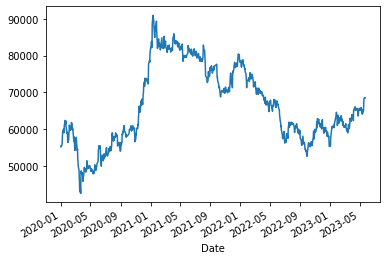

In [30]:
# 라인 그래프로 보여주기
df = fdr.DataReader('005930', '2020')
df['Close'].plot()

<AxesSubplot:>

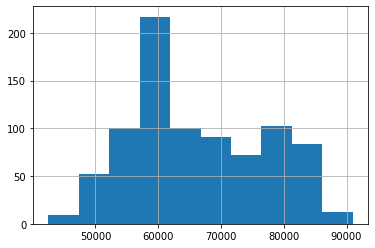

In [31]:
# 막대그래프 보여주기
df['Close'].hist()

In [32]:
#2022 주가 가져오기
import FinanceDataReader as fdr
fdr.DataReader('005930', start = '2022', end = '2022')

,Open,High,Low,Close,Volume,Change
Date,,,,,,


In [33]:
#2022 주가 가져오기
import FinanceDataReader as fdr
fdr.DataReader('005930', start = '2022', end = '2023')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454


# pandas_datareader

## 네이버

In [34]:
# 데이터소스 :  naver로 지정하면 1990년 데이터부터 조회할 수 있고, yahoo로 지정하면 2000년 데이터부터 조회 가능
# 액면분할이 고려된 수정주가로 조회됨
# yahoo finance를 데이터소스로 사용할 때는 종목코드 뒤에 코스피 종목인 경우 .KS, 코스닥 종목인 경우 .KQ를 붙여줘야 함

In [2]:
# 설치하기
!pip install pandas-datareader

In [5]:
import pandas_datareader.data as web

df = web.DataReader('005930', 'naver', start='2023-01-01', end='2023-05-30')

df

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-02,55500,56100,55200,55500,10031448
2023-01-03,55400,56000,54500,55400,13547030
2023-01-04,55700,58000,55600,57800,20188071
2023-01-05,58200,58800,57600,58200,15682826
2023-01-06,58300,59400,57900,59000,17334989
...,...,...,...,...,...
2023-05-23,68500,68700,68100,68400,8561643
2023-05-24,68100,68700,68000,68500,8192896
2023-05-25,69900,70000,68700,68800,14231160


# pykrx

https://github.com/sharebook-kr/pykrx


In [38]:
# KRX, Naver 등의 웹사이트에서 주가정보를 스크래핑하는 모듈

# 특정 시점의 상장 종목코드 조회 가능
# 해당 종목코드의 종목명을 조회하는 함수가 별도로 존재

## 설치하기

In [39]:
# 설치하기
!pip install pykrx

## 데이터 가져오기

In [6]:
# pykrx의 stock 모듈을 import 한 후 다른 작업 진행

In [7]:
# "get_market_ticker_list" 메서드는 주식 종목들을 가져오기
# "get_market_ticker_name" 메서드는 심볼(티커)을 받으면 기업 이름을 가져오기

In [10]:
# KOSPI/KOSDAQ/KONEX 종목코드 조회
from pykrx import stock

stock_code = stock.get_market_ticker_list(date="20230530", market="ALL")
(stock_code[:6], len(stock_code))

(['060310', '095570', '006840', '054620', '265520', '211270'], 2718)

In [11]:
# KOSPI 종목코드 조회
stock_code = stock.get_market_ticker_list(date="20230530", market="KOSPI")
(stock_code[:6], len(stock_code))

(['095570', '006840', '027410', '282330', '138930', '001460'], 949)

In [13]:
kospi = stock.get_market_ticker_list("20230530", market="KOSPI")
kospi[:5]

['095570', '006840', '027410', '282330', '138930']

In [14]:
# KOSDAQ 종목코드 조회
stock_code = stock.get_market_ticker_list(date="20230530", market="KOSDAQ")
(stock_code[:6], len(stock_code))

(['060310', '054620', '265520', '211270', '126600', '013720'], 1640)

In [15]:
# 종목명 반환
stock_name = stock.get_market_ticker_name("005930")
stock_name

'삼성전자'

In [16]:
# "get_market_ohlcv" 메서드는 OHLCV 주식 시세를 가져오기
# 일자별 OHLCV(시가, 고가, 저가, 종가, 거래량) 조회¶

# 삼성전자의 20220101~20220920의 주가데이터
df = stock.get_market_ohlcv_by_date(fromdate="20230101", todate="20230530", ticker="005930")
df

,시가,고가,저가,종가,거래량
날짜,,,,,
2023-01-02,55500,56100,55200,55500,10031448
2023-01-03,55400,56000,54500,55400,13547030
2023-01-04,55700,58000,55600,57800,20188071
2023-01-05,58200,58800,57600,58200,15682826
2023-01-06,58300,59400,57900,59000,17334989
...,...,...,...,...,...
2023-05-23,68500,68700,68100,68400,8561643
2023-05-24,68100,68700,68000,68500,8192896
2023-05-25,69900,70000,68700,68800,14231160


In [17]:
# 일정 기간 종목의 가격 변동 조회Permalink
# get_market_price_change_by_ticker(fromdate=”조회시작일”, todate=”조회종료일”, market=”거래소명”)

In [18]:
df = stock.get_market_price_change_by_ticker(fromdate="20230101", todate="20230530")
df.head()

,종목명,시가,종가,변동폭,등락률,거래량,거래대금
티커,,,,,,,
095570,AJ네트웍스,5720,4330,-1390,-2430.0,22480756,121193172930
006840,AK홀딩스,17200,19020,1820,1058.0,1944452,35685880670
027410,BGF,4305,4130,-175,-407.0,15686463,68583915050
282330,BGF리테일,210500,183400,-27100,-1287.0,3191531,592101265764
138930,BNK금융지주,6500,6740,240,369.0,105907640,713291957110


In [19]:
# 특정 일자 전체 종목 시세 OHLCV(시가, 고가, 저가, 종가, 거래량, 거래대금, 등락률) 가져오기
# stock.get_market_ohlcv_by_ticker(date=날짜)

In [20]:
df = stock.get_market_ohlcv_by_ticker(date="20230530")
df.head()

,시가,고가,저가,종가,거래량,거래대금,등락률
티커,,,,,,,
095570,4345,4395,4300,4330,126253,547592385,0.12
006840,19410,19450,18900,19020,13442,257458150,-2.01
027410,4140,4160,4085,4130,72358,298356300,-0.24
282330,183900,186400,181300,183400,31911,5845173200,0.33
138930,6730,6770,6690,6740,594716,4000523500,0.30


In [21]:
# 개별종목 날짜별 OHLCV(시가, 고가, 저가, 종가, 거래량, 거래대금, 등락률) 가져오기
# stock.get_market_ohlcv_by_date(조회시작일, 조회종료일, 종목코드)

In [22]:
df = stock.get_market_ohlcv_by_date("20230120", "20230530", "005930")
df.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2023-01-20,62100,62300,61100,61800,9646327
2023-01-25,63500,63700,63000,63400,16822710
2023-01-26,63800,63900,63300,63900,13278277
2023-01-27,64400,65000,63900,64600,18760182
2023-01-30,64900,64900,63100,63300,20995234


In [23]:
df = stock.get_market_ohlcv_by_date("20230120", "20230525", "005930")
df

,시가,고가,저가,종가,거래량
날짜,,,,,
2023-01-20,62100,62300,61100,61800,9646327
2023-01-25,63500,63700,63000,63400,16822710
2023-01-26,63800,63900,63300,63900,13278277
2023-01-27,64400,65000,63900,64600,18760182
2023-01-30,64900,64900,63100,63300,20995234
...,...,...,...,...,...
2023-05-19,67800,68400,67500,68400,20349345
2023-05-22,68400,69000,68000,68500,14470308
2023-05-23,68500,68700,68100,68400,8561643


In [24]:
# 전체 종목의 펀더멘탈 지표(PER, PBR, EPS, BPS, DIV, DPS) 가져오기
# stock.get_market_fundamental_by_ticker(date=날짜, market=거래소)

# market의 기본값은 "ALL"

# DIV(배당수익률): (주가배당금/주가) * 100

# BPS(주당순자산가치=청산가치): (순자산)/(총발행주식수)

# PER(주가수익비율): (주가)/(주당순이익)

# EPS(주당순이익): (당기순이익)/(총발행주식수)

# PBR(주가순자산비율) = (주가)/(BPS) = PER*EPS / BPS


In [25]:
df = stock.get_market_fundamental_by_ticker(date='20230517', market="ALL")
df.head()

,BPS,PER,PBR,EPS,DIV,DPS
티커,,,,,,
060310,829,67.750000,2.699219,33,0.000000,0
095570,8076,22.265625,0.549805,201,6.031250,270
006840,41948,0.000000,0.489990,0,0.970215,200
054620,10864,23.765625,1.099609,505,0.000000,0
265520,17980,3.730469,1.129883,5463,1.330078,270


In [26]:


# 특정일자의 종목별 DIV/BPS/PER/EPS 조회
# get_market_fundamental_by_ticker (date="YYYYMMDD", market="거래소명")


In [27]:
df = stock.get_market_fundamental_by_ticker(date="20230520")
df.head()

,BPS,PER,PBR,EPS,DIV,DPS
티커,,,,,,
095570,0,0.0,0.0,0,0.0,0
006840,0,0.0,0.0,0,0.0,0
027410,0,0.0,0.0,0,0.0,0
282330,0,0.0,0.0,0,0.0,0
138930,0,0.0,0.0,0,0.0,0


In [28]:
# 일자별 개별종목 DIV/BPS/PER/EPS 조회
# get_market_fundamental_by_date(fromdate, todate, ticker, freq='d', name_display=False)

# freq: d(일), m(월), y(연도)

In [29]:
# 삼성전자 종목에 대한 시장가치 
df = stock.get_market_fundamental_by_date(fromdate="20230101", todate="20230530", ticker="005930")
df

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2023-01-02,43611,9.61,1.27,5777,2.60,1444
2023-01-03,43611,9.59,1.27,5777,2.61,1444
2023-01-04,43611,10.01,1.33,5777,2.50,1444
2023-01-05,43611,10.07,1.33,5777,2.48,1444
2023-01-06,43611,10.21,1.35,5777,2.45,1444
...,...,...,...,...,...,...
2023-05-23,57822,8.49,1.18,8057,2.11,1444
2023-05-24,57822,8.50,1.18,8057,2.11,1444
2023-05-25,57822,8.54,1.19,8057,2.10,1444


In [31]:
#frequency 파라미터(d/m/y)를 추가
df = stock.get_market_fundamental_by_date("20230101", "20230430", "005930", freq="m")
print(df.head(2))

              BPS    PER   PBR   EPS   DIV   DPS
날짜                                              
2023-01-31  43611   9.61  1.27  5777  2.60  1444
2023-02-28  43611  10.70  1.42  5777  2.34  1444


In [32]:
# 삼성전자의 fundamental 지표 확인하기
df = stock.get_market_fundamental_by_date(fromdate="20220101", todate="20221231", ticker="005930")
df.head()

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2022-01-03,39406,20.46,1.99,3841,3.81,2994
2022-01-04,39406,20.49,2.00,3841,3.80,2994
2022-01-05,39406,20.15,1.96,3841,3.87,2994
2022-01-06,39406,20.02,1.95,3841,3.89,2994
2022-01-07,39406,20.39,1.99,3841,3.82,2994


In [33]:
#지정된 기간 동안의 일자별로 정렬된 (순매수) 거래량
df = stock.get_market_trading_value_by_date("20220101", "20221231", "005930")
print(df.head())

                    기관합계        기타법인            개인         외국인합계  전체
날짜                                                                  
2022-01-03 -329791819300  4774451400  184943470500  140073897400   0
2022-01-04 -206326913300  1908886100   91958901300  112459125900   0
2022-01-05 -598003977100 -8062754100  649419857800  -43353126600   0
2022-01-06 -171750680700  3976748900   -3254631500  171028563300   0
2022-01-07 -165044032600 -3880739900 -171571901600  340496674100   0


In [34]:
# 매수 혹은 매도 금액을 조회하고 싶다면 on 파라미터에 입력할 수 있습니다. 입력하지 않는다면 순매수 금액이 조회
df = stock.get_market_trading_value_by_date("20220101", "20221231", "005930", on='매도')
print(df.head())

                     기관합계         기타법인            개인         외국인합계  \
날짜                                                                   
2022-01-03   691360020800   1667383000  222107554600  150871879350   
2022-01-04   665953075400   2061713100  183736821500  126239003000   
2022-01-05  1201554187200  19090264300  318785065800  428411992500   
2022-01-06   552052689000   4196048100  292891066100  147238629370   
2022-01-07   553586244200  11129477100  390964989100  228555842300   

                       전체  
날짜                         
2022-01-03  1066006837750  
2022-01-04   977990613000  
2022-01-05  1967841509800  
2022-01-06   996378432570  
2022-01-07  1184236552700  


In [35]:
df = stock.get_market_trading_value_by_date("20220101", "20221231", "005930", on='매수')
print(df.head())

                    기관합계         기타법인            개인         외국인합계  \
날짜                                                                  
2022-01-03  361568201500   6441834400  407051025100  290945776750   
2022-01-04  459626162100   3970599200  275695722800  238698128900   
2022-01-05  603550210100  11027510200  968204923600  385058865900   
2022-01-06  380302008300   8172797000  289636434600  318267192670   
2022-01-07  388542211600   7248737200  219393087500  569052516400   

                       전체  
날짜                         
2022-01-03  1066006837750  
2022-01-04   977990613000  
2022-01-05  1967841509800  
2022-01-06   996378432570  
2022-01-07  1184236552700  


In [36]:
# 시장의 거래대금을 조회할 때는 ETF, ETN ELW의 포함 여부를 지정할 수 있습니다. 
# 만약 값을 지정하지 않는다면 해당 데이터를 제외한 값을을 반환

df = stock.get_market_trading_value_by_date("20210115", "20210122", "KOSPI", etf=True, etn=True, elw=True)
print(df.head())

                     기관합계         기타법인             개인         외국인합계  전체
날짜                                                                     
2021-01-15 -1536570309441  63110174617  2251672617980 -778212483156   0
2021-01-18  -601428111357 -27000808439   494341183227  134087736569   0
2021-01-19   544654406338  21787409868  -968965427363  402523611157   0
2021-01-20 -1227642472619  32139813590  1444113501769 -248610842740   0
2021-01-21  -284899892322 -19072459127   -61503500921  365475852370   0


In [37]:
#일자별 시장의 거래량을 조회
df = stock.get_market_trading_volume_by_date("20220101", "20220701", "005930")
print(df.head())

               기관합계    기타법인       개인    외국인합계  전체
날짜                                               
2022-01-03 -4178268   60481  2349662  1768125   0
2022-01-04 -2623794   24292  1170907  1428595   0
2022-01-05 -7727282 -103764  8414591  -583545   0
2022-01-06 -2229379   51631   -41729  2219477   0
2022-01-07 -2115197  -49515 -2194573  4359285   0


In [38]:
# 매수 혹은 매도 거래량만을 조회하고 싶다면 on 파라미터에 입력 가능
# 입력하지 않는다면 순매수 수량이 조회
df = stock.get_market_trading_volume_by_date("20220101", "20220701", "005930", on='매도')
print(df.head())

                기관합계    기타법인       개인    외국인합계        전체
날짜                                                      
2022-01-03   8759701   21053  2807663  1913695  13502112
2022-01-04   8463883   26174  2332823  1604536  12427416
2022-01-05  15538421  246850  4129142  5556227  25470640
2022-01-06   7164696   54432  3801704  1911122  12931954
2022-01-07   7090895  142380  5006070  2924412  15163757


In [64]:
#지정된 기간 동안의 투자자별로 정렬된 (순매수) 거래대금
df = stock.get_market_trading_value_by_investor("20210101", "20210701", "005930")
print(df.head())

                   매도              매수            순매수
투자자구분                                               
금융투자   31066223912100  28464867937600 -2601355974500
보험      1808485504300    779839009100 -1028646495200
투신      3177067544700   1794360840100 -1382706704600
사모      1259026093300    955202197900  -303823895400
은행       149110410100     87504448700   -61605961400


In [65]:
#세 번째 파라미터에 KOSPI, KOSDAQ, KONEX를 지정하면 각 시장의 거래대금을 조회
# ALL을 입력하면 세 개의 시장을 합친 통합 거래대금을 조회
df = stock.get_market_trading_value_by_investor("20210101", "20210701", "KOSPI")
print(df.head())

                    매도               매수            순매수
투자자구분                                                 
금융투자   129106291931852  124118597123721 -4987694808131
보험      14553591609599   11217910114022 -3335681495577
투신      30145646816976   25894892024771 -4250754792205
사모      16717352065581   13748646227789 -2968705837792
은행       2106750785171     829995794830 -1276754990341


In [66]:
#시장의 거래대금을 조회할 때는 ETF, ETN ELW의 포함 여부를 지정 가능
#만약 값을 지정하지 않는다면 해당 데이터를 제외한 값을을 반환
# 옵션은 KOSPI, KOSDAQ, KONEX 조회할 때만 유효
df = stock.get_market_trading_value_by_investor("20210115", "20210122", "KOSPI", etf=True, etn=True, elw=True)
print(df.head())

                   매도              매수           순매수
투자자구분                                              
금융투자   15985568261831  15006116511544 -979451750287
보험      1219035502445    757575677208 -461459825237
투신      2235561259511   1799363743367 -436197516144
사모       999084910863    846067212945 -153017697918
은행       886226324790    936210985810   49984661020


In [67]:
# 지정된 기간 동안의 투자자별로 정렬된 (순매수) 거래량
df = stock.get_market_trading_volume_by_investor("20230115", "20230522", "005930")
print(df.head())

              매도         매수      순매수
투자자구분                               
금융투자   123222925  114599222 -8623703
보험       5304607    4443301  -861306
투신      15475556   13069443 -2406113
사모      16348090   13914805 -2433285
은행        829094     825089    -4005


In [68]:
# 종몹별 시총 가져오기
# get_market_cap_by_ticker 함수는 특정 일자의 종목별 시가총액/거래량/거래대금/상장주식수/외국인보유주식수를 조회
#외국인보유주식수는 D-2 (영업일 기준)일 까지 유효한 값이 출력되며, D-1일은 0으로 표기
df = stock.get_market_cap_by_ticker("20230101")
print(df.head())

The date you entered 20230101 seems to be a holiday. PYKRX changes the date parameter to 20221229 to query the requested information.
            종가             시가총액       거래량          거래대금       상장주식수
티커                                                                 
005930   55300  330128975015000  11295935  628653753150  5969782550
373220  435500  101907000000000    265226  116156988000   234000000
207940  821000   58433854000000     35179   28994143000    71174000
000660   75000   54600177375000   1736661  130328025000   728002365
051910  600000   42355405800000    103968   62525555000    70592343


In [69]:
# 일자별 시가 총액 조회
# get_market_cap_by_date 함수는 특정 종목의 일자별 시가총액을 조회
#거래량/거래대금/상장주식수가 함께 조회
df = stock.get_market_cap_by_date("20230101", "20230501", "005930")
print(df.head())
print(df.tail())

                       시가총액       거래량           거래대금       상장주식수
날짜                                                              
2023-01-02  331322931525000  10031448   558433491400  5969782550
2023-01-03  330725953270000  13547030   747898872200  5969782550
2023-01-04  345053431390000  20188071  1151473733800  5969782550
2023-01-05  347441344410000  15682826   911973904900  5969782550
2023-01-06  352217170450000  17334989  1018769177900  5969782550
                       시가총액       거래량           거래대금       상장주식수
날짜                                                              
2023-04-24  389229822260000  12986581   846720734506  5969782550
2023-04-25  379678170180000  16193271  1039508079324  5969782550
2023-04-26  382663061455000  12664541   808719849900  5969782550
2023-04-27  385647952730000  14779601   947849082200  5969782550
2023-04-28  391020757025000  19699481  1288159418828  5969782550


In [70]:
#get_market_cap_by_date() 함수에 frequency 파라미터(d/m/y)를 추가
# d는 일자, m은 월, y는 연도를 의미
# 시가총액과 상장주식수는 월별 마지막 거래일의 값을 사용
df = stock.get_market_cap_by_date("20220101", "20221231", "005930", "m")
print(df.head())

                       시가총액        거래량            거래대금       상장주식수
날짜                                                                
2022-01-31  437585060915000  280187100  21353687791872  5969782550
2022-02-28  430421321855000  233201135  17162868317227  5969782550
2022-03-31  415496865480000  307432780  21623031900069  5969782550
2022-04-30  402363343870000  309880731  20862445445512  5969782550
2022-05-31  402363343870000  310129252  20749258205428  5969782550


In [71]:
# 시가총액과 상장주식수는 월별 마지막 거래일의 값을 사용

df = stock.get_market_cap_by_date("20220101", "20221231", "005930", "m")
print(df.head())
print(df)

                       시가총액        거래량            거래대금       상장주식수
날짜                                                                
2022-01-31  437585060915000  280187100  21353687791872  5969782550
2022-02-28  430421321855000  233201135  17162868317227  5969782550
2022-03-31  415496865480000  307432780  21623031900069  5969782550
2022-04-30  402363343870000  309880731  20862445445512  5969782550
2022-05-31  402363343870000  310129252  20749258205428  5969782550
                       시가총액        거래량            거래대금       상장주식수
날짜                                                                
2022-01-31  437585060915000  280187100  21353687791872  5969782550
2022-02-28  430421321855000  233201135  17162868317227  5969782550
2022-03-31  415496865480000  307432780  21623031900069  5969782550
2022-04-30  402363343870000  309880731  20862445445512  5969782550
2022-05-31  402363343870000  310129252  20749258205428  5969782550
2022-06-30  340277605350000  428473209  26052954770686  596978

In [72]:
# get_exhaustion_rates_of_foreign_investment_by_ticker 함수
#상장주식수/외국인한도수량/외국인보유수량/외국인한도소진률 정보를 조회
#외국인 보유수량 및 한도소진율은 장개시 시점 기준(금융감독원 외국인투자 관리시스템 제공 전일자 확정치)

df = stock.get_exhaustion_rates_of_foreign_investment_by_ticker('20220701')
print(df.head())
df

            상장주식수      보유수량        지분율       한도수량      한도소진율
티커                                                          
000020   27931470   1383654   4.949219   27931470   4.949219
000040   96137631  43758152  45.531250   96137631  45.531250
000050   27415270    312604   1.139648   27415270   1.139648
000060  120625000  13430141  11.132812  120625000  11.132812
000070    8564271    653119   7.628906    8564271   7.628906


,상장주식수,보유수량,지분율,한도수량,한도소진율
티커,,,,,
000020,27931470,1383654,4.949219,27931470,4.949219
000040,96137631,43758152,45.531250,96137631,45.531250
000050,27415270,312604,1.139648,27415270,1.139648
000060,120625000,13430141,11.132812,120625000,11.132812
000070,8564271,653119,7.628906,8564271,7.628906
...,...,...,...,...,...
402340,141467571,57853491,40.906250,141467571,40.906250
404990,55955884,1015214,1.809570,55955884,1.809570
417310,40400000,382393,0.950195,40400000,0.950195


In [74]:
# 두 번째 파라미터 market은 코스피(KOSPI)/코스닥(KOSDAQ)/코넥스(KONEX) 시장을 지정해서 조회

df = stock.get_exhaustion_rates_of_foreign_investment_by_ticker('20220703', "KOSPI")
print(df.head())

KeyError: "None of [Index(['ISU_SRT_CD', 'LIST_SHRS', 'FORN_HD_QTY', 'FORN_SHR_RT',\n       'FORN_ORD_LMT_QTY', 'FORN_LMT_EXHST_RT'],\n      dtype='object')] are in the [columns]"

In [63]:
# get_index_name 함수를 사용해서 티커의 이름

for ticker in stock.get_index_ticker_list():
    print(ticker, stock.get_index_ticker_name(ticker))

1001 코스피
1002 코스피 대형주
1003 코스피 중형주
1004 코스피 소형주
1005 음식료품
1006 섬유의복
1007 종이목재
1008 화학
1009 의약품
1010 비금속광물
1011 철강금속
1012 기계
1013 전기전자
1014 의료정밀
1015 운수장비
1016 유통업
1017 전기가스업
1018 건설업
1019 운수창고업
1020 통신업
1021 금융업
1024 증권
1025 보험
1026 서비스업
1027 제조업
1028 코스피 200
1034 코스피 100
1035 코스피 50
1150 코스피 200 커뮤니케이션서비스
1151 코스피 200 건설
1152 코스피 200 중공업
1153 코스피 200 철강/소재
1154 코스피 200 에너지/화학
1155 코스피 200 정보기술
1156 코스피 200 금융
1157 코스피 200 생활소비재
1158 코스피 200 경기소비재
1159 코스피 200 산업재
1160 코스피 200 헬스케어
1167 코스피 200 중소형주
1182 코스피 200 초대형제외 지수
1224 코스피 200 비중상한 30%
1227 코스피 200 비중상한 25%
1232 코스피 200 비중상한 20%
1244 코스피200제외 코스피지수
1894 코스피 200 TOP 10


In [76]:
# 인덱스 구성종목 조회

# 인덱스를 구성하고 있는 종목의 티커를 리스트로 반환

pdf = stock.get_index_portfolio_deposit_file("1013")
print(len(pdf), pdf)

63 ['005930', '373220', '000660', '006400', '003670', '066570', '009150', '011070', '361610', '034220', '020150', '000990', '272210', '336260', '010120', '108320', '267260', '001440', '336370', '353200', '248070', '195870', '007660', '007340', '298040', '033240', '025540', '004490', '192650', '097520', '009450', '322000', '001820', '011930', '007810', '029530', '092220', '004710', '011690', '103590', '017900', '009470', '109070', '008700', '005680', '044380', '033180', '020760', '019180', '017040', '015260', '014910', '011230', '009140', '008110', '007610', '006340', '005870', '004770', '000300', '000500', '001210', '019490']


In [77]:
#  인덱스 OHLCV 조회
# get_index_ohlcv_by_date() 함수는 입력된 기간 동안의 인덱스 OHLCV를 조회

df = stock.get_index_ohlcv_by_date("20220101", "20221231", "1013")
print(df.head())
df

                  시가        고가        저가        종가        거래량           거래대금
날짜                                                                          
2022-01-03  30616.83  30755.41  30224.90  30316.17  107006140  2861491295980
2022-01-04  30426.52  30548.83  30218.89  30318.49  124181264  3181726023760
2022-01-05  30275.49  30355.92  29417.16  29788.53  176551548  5024253866715
2022-01-06  29480.66  29882.06  29399.28  29501.96   85117259  2994884871925
2022-01-07  29793.48  30085.93  29767.30  29989.83   70079870  3058066977310


,시가,고가,저가,종가,거래량,거래대금
날짜,,,,,,
2022-01-03,30616.83,30755.41,30224.90,30316.17,107006140,2861491295980
2022-01-04,30426.52,30548.83,30218.89,30318.49,124181264,3181726023760
2022-01-05,30275.49,30355.92,29417.16,29788.53,176551548,5024253866715
2022-01-06,29480.66,29882.06,29399.28,29501.96,85117259,2994884871925
2022-01-07,29793.48,30085.93,29767.30,29989.83,70079870,3058066977310
...,...,...,...,...,...,...
2022-12-23,22266.08,22338.24,22139.79,22192.61,36247005,1320298244671
2022-12-26,22136.40,22212.11,22078.25,22138.71,26294430,958330677288
2022-12-27,22220.29,22305.72,22094.69,22196.02,34133859,1347303482743


In [78]:
# get_index_ohlcv_by_date() 함수에 frequency 파라미터(d/m/y)를 추가 rksmd
# d는 일자, m은 월, y는 연도를 의미

df = stock.get_index_ohlcv_by_date("20220101", "20221231", "1013", "m")
print(df.head())

                  시가        고가        저가        종가         거래량
날짜                                                            
2022-01-31  30616.83  30755.41  26755.21  27332.44  1959086884
2022-02-28  27854.08  28598.78  26324.70  26676.83  1369583518
2022-03-31  26727.34  27322.27  25098.97  26506.48  1988800683
2022-04-30  26409.51  26517.12  24749.39  25609.41  2654150237
2022-05-31  25285.97  26044.67  24422.41  25581.04  3396172726


# yfinance

## 설치하기

In [87]:
# yfinance --user  설치하기
!pip install yfinance --user

## 불러오기

In [49]:
import yfinance as yf

In [50]:
# yahoo finance
# 코스피 종목에는 .KS, 코스닥 종목에는 .KQ를 붙여줘야 함
# 가장 다양한 정보 확인 가능 - 배당정보, 분할정보, 재무정보 등
# 2000년 데이터부터 조회 가능
# end에 설정한 일자의 전일자까지 조회되기 때문에 조회하고자 하는 종료일+1일을 end에 넣어줘야함
# 분단위 데이터도 조회 가능하지만 조회 가능한 기간에 제한이 있음

In [53]:
import yfinance as yf

ticker = yf.Ticker('005930.KS')
 
ticker.history(
               interval='1d',
               start= '2023-01-01',
               end='2023-05-24',
               actions=True,
               auto_adjust=True)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-02,55180.453125,55776.998564,54882.180405,55180.453125,10031448,0.0,0
2023-01-03,55081.031250,55677.576715,54186.213053,55081.031250,13547030,0.0,0
2023-01-04,55379.301890,57666.059418,55279.877649,57467.210938,20188071,0.0,0
2023-01-05,57864.910156,58461.455622,57268.364691,57864.910156,15682826,0.0,0
2023-01-06,57964.334971,59058.001668,57566.637990,58660.304688,17334989,0.0,0
...,...,...,...,...,...,...,...
2023-05-17,65900.000000,65900.000000,64800.000000,65000.000000,10745504,0.0,0
2023-05-18,66000.000000,66200.000000,65700.000000,66200.000000,14431704,0.0,0
2023-05-19,67800.000000,68400.000000,67500.000000,68400.000000,20349345,0.0,0


In [54]:
# 애플 주가 가져오기

import yfinance as yf

yf.download('AAPL', start = '2023-01-01')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.706833,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.993095,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.656975,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,129.243622,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.772079,70790800
...,...,...,...,...,...,...
2023-05-23,173.130005,173.380005,171.279999,171.559998,171.559998,50747300
2023-05-24,171.089996,172.419998,170.520004,171.839996,171.839996,45143500
2023-05-25,172.410004,173.899994,171.690002,172.990005,172.990005,56058300


심볼보기
https://github.com/financedata-org/FinanceDataReader/wiki/Quick-Reference

In [90]:
# 한국 주요 지수
# 미국 주요 지수
# 국가별 대표 지수
# 상품선물
# 환율
# 채권 수익률 등

In [55]:
import FinanceDataReader as fdr

sp500 = fdr.StockListing('S&P500')
sp500.head(10)

,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ACN,Accenture,Information Technology,IT Consulting & Other Services
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment
6,ADM,ADM,Consumer Staples,Agricultural Products & Services
7,ADBE,Adobe Inc.,Information Technology,Application Software
8,ADP,ADP,Industrials,Human Resource & Employment Services
9,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail


In [56]:
# S&P500 종목은 실제 503개
len(sp500)

503

In [57]:
# Indexes: 'KS11'(코스피지수), 'KQ11'(코스닥지수), 'DJI'(다우존스지수), 'IXIC'(나스닥지수), 'US500'(S&P 500지수) ...

In [58]:
# Exchanges: 'USD/KRX', 'USD/EUR', 'CNY/KRW' ... (조합가능한 화폐별 환율 데이터 일자별)